In [2]:
dedges = [(0,1,10),(0,2,80),(1,2,6),(1,4,20),(2,3,70),(4,5,50),(4,6,5),(5,6,10)]
size = 7
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in dedges:
    WL[i].append((j,d))
print(WL)

{0: [(1, 10), (2, 80)], 1: [(2, 6), (4, 20)], 2: [(3, 70)], 3: [], 4: [(5, 50), (6, 5)], 5: [(6, 10)], 6: []}


In [9]:
import numpy as np 


def dijkstras_list(WList , source ):
    visited , distance  = {} , {}
    
    for vertex in WList.keys():
        visited[vertex] = False 
        distance[vertex] = np.inf
    distance[source] = 0 
    for _ in WList.keys():
        
        min_distance = min([distance[vertex] for vertex in WList.keys() if not visited[vertex]])
        
        next_vertex_list = [vertex for vertex in WList.keys() if distance[vertex] ==min_distance ]
        
        next_vertex = min(next_vertex_list)
        visited[next_vertex] = True 
        
        for vertex , distance_to in WList[next_vertex]:
            if not visited[vertex]:
                if distance[next_vertex] + distance_to < distance[vertex]:
                    distance[vertex] = distance[next_vertex] + distance_to
    return distance                
        

In [10]:
dedges = [(0,1,10),(0,2,80),(1,2,6),(1,4,20),(2,3,70),(4,5,50),(4,6,5),(5,6,10)]
size = 7
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in dedges:
    WL[i].append((j,d))
print(dijkstras_list(WL,0))

{0: 0, 1: 10, 2: 16, 3: 86, 4: 30, 5: 80, 6: 35}


### Implementation of Bellman Ford for adjacency LIst 


In [13]:
def bellmanfordlist(WList,source):
    
    distance = {}
    
    for vertex in WList.keys():
        
        distance[vertex] = np.inf
    distance[source] =0 
    for _ in WList.keys(): # to make sure we compute shortest path for all vertex n times for n vertex 
        for parent in WList.keys():
            for child , to_distance in WList[parent]:
                if distance[parent]+ to_distance < distance[child]:
                    distance[child] = distance[parent] + to_distance
    return distance

In [14]:
edges = [(0,1,10),(0,7,8),(1,5,2),(2,1,1),(2,3,1),(3,4,3),(4,5,-1),(5,2,-2),(6,1,-4),(6,5,-1),(7,6,1)]
size = 8
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edges:
    WL[i].append((j,d))
print(bellmanfordlist(WL,0))

{0: 0, 1: 5, 2: 5, 3: 6, 4: 9, 5: 7, 6: 9, 7: 8}


# All pair of shortest path
- Floyd Warshall Algorithm 

In [16]:
def floydwarshall(Wmat):
    rows , cols , x = Wmat.shape 
    conn = 0 
    weight = 1 
    
    SP = np.zeros(shape=(rows, cols, cols+1))
    
    for  parent in range(rows):
        for child in range(cols):
            if Wmat[parent,child,conn] == 1:
                SP[parent,child, conn] = Wmat[parent,child,weight] 
            else:
                SP[parent,child,conn] = np.inf
    for  K in range(1, cols+1):
        for parent in range(rows):
            for child in range(cols):
                SP[parent, child,K] = min(SP[parent,child, K-1] , SP[parent, K-1 , K-1]+ SP[K-1, child, K-1])
    return SP[:,:,cols]

In [24]:
edges = [(0,1,10),(0,7,8),(1,5,2),(2,1,1),(2,3,1),(3,4,3),(4,5,-1),(5,2,-2),(6,1,-4),(6,5,-1),(7,6,1)]
size = 8
import numpy as np
W = np.zeros(shape=(size,size,2))
for (i,j,w) in edges:
    W[i,j,0] = 1
    W[i,j,1] = w    
print(floydwarshall(W))

[[inf  5.  5.  6.  9.  7.  9.  8.]
 [inf  1.  0.  1.  4.  2. inf inf]
 [inf  1.  1.  1.  4.  3. inf inf]
 [inf  1.  0.  1.  3.  2. inf inf]
 [inf -2. -3. -2.  1. -1. inf inf]
 [inf -1. -2. -1.  2.  1. inf inf]
 [inf -4. -4. -3.  0. -2. inf inf]
 [inf -3. -3. -2.  1. -1.  1. inf]]


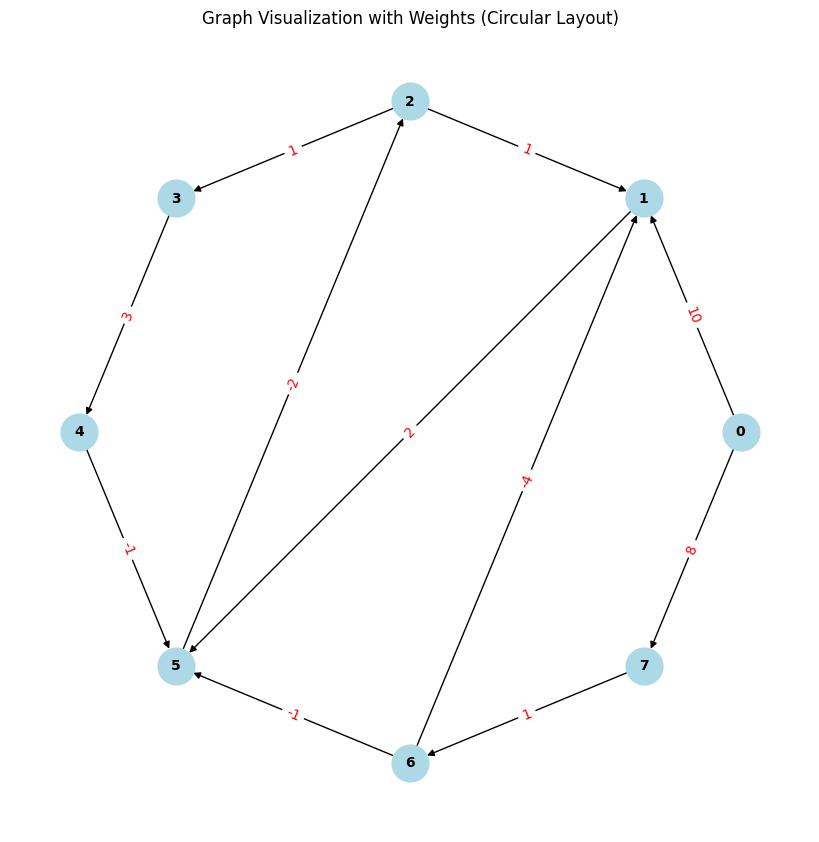

In [28]:
import networkx as nx 
import matplotlib.pyplot as plt 
# Create a directed graph
G = nx.DiGraph()
size = 8
# Add edges to the graph
for (i, j, w) in edges:
    G.add_edge(i, j, weight=w)

# Define positions for nodes in a circular layout
pos = {i: (np.cos(2 * np.pi * i / size), np.sin(2 * np.pi * i / size)) for i in range(size)}

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

# Draw edge labels
edge_labels = {(i, j): w for (i, j, w) in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the plot
plt.title("Graph Visualization with Weights (Circular Layout)")
plt.show()

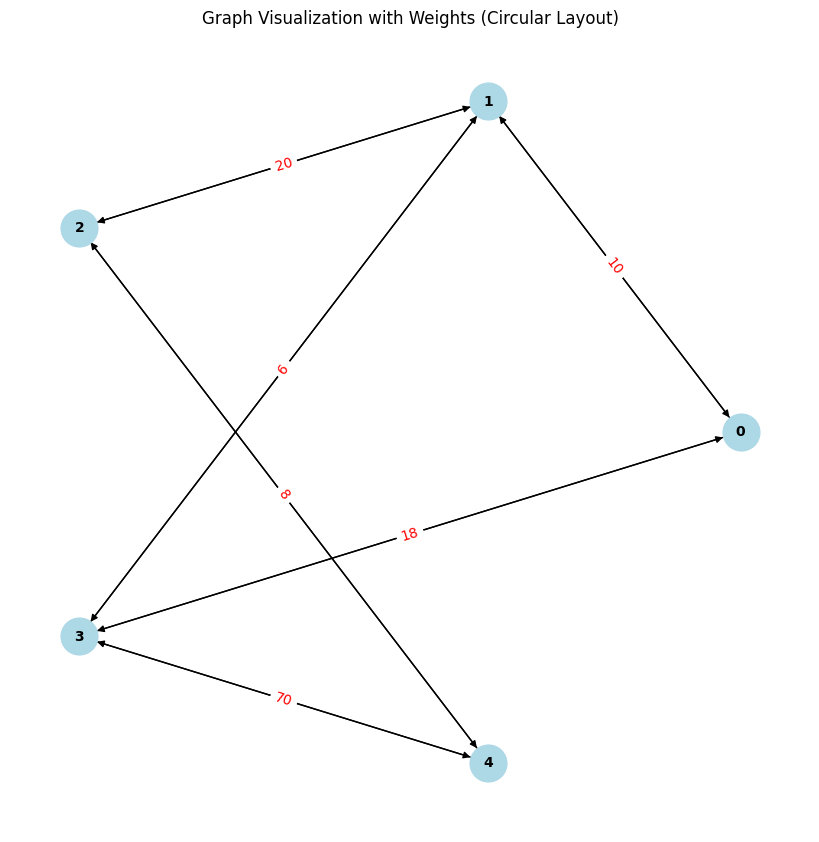

In [29]:

dedges = [(0,1,10),(0,3,18),(1,2,20),(1,3,6),(2,4,8),(3,4,70)]
edges = dedges + [(j,i,w) for (i,j,w) in dedges]
size = 5
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edges:
    WL[i].append((j,d))
G = nx.DiGraph()

# Add edges to the graph
for (i, j, w) in edges:
    G.add_edge(i, j, weight=w)

# Define positions for nodes in a circular layout
pos = {i: (np.cos(2 * np.pi * i / size), np.sin(2 * np.pi * i / size)) for i in range(size)}

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

# Draw edge labels
edge_labels = {(i, j): w for (i, j, w) in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the plot
plt.title("Graph Visualization with Weights (Circular Layout)")
plt.show()

In [37]:
def primlist(Wlist):
    
    visited , distance , TE = {}, {} , []
    
    for vertex in Wlist.keys():
        visited[vertex] , distance[vertex] = False , np.inf 
        
    visited[0] = True 
    for child , to_distance in Wlist[0]:
        distance[child] = to_distance
    for _ in range(1, len(Wlist.keys())):
        mindist = np.inf
        nextvertex = None 
        for parent in Wlist.keys():
            for child , to_weight in Wlist[parent]:
                if visited[parent] and (not visited[child]) and to_weight < mindist:
                    mindist = to_weight
                    nextvertex= child
                    nextedge = (parent, child)
        if nextvertex is None:
          break            
        visited[nextvertex] = True 
        TE.append(nextedge)
        for child , to_distance in Wlist[nextvertex]:
            if not visited[child]:
                if to_distance < distance[child]:
                    distance[child] = to_distance
    return TE  

In [49]:
dedges = [(0,1,10),(0,2,18),(1,2,6),(1,4,20),(2,3,70),(4,5,10),(4,6,10),(5,6,5)]
edges = dedges + [(j,i,w) for (i,j,w) in dedges]
size = 7
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edges:
    WL[i].append((j,d))
TEedge = primlist(WL)

In [50]:
mcst_list = []

for parent , child , weight  in dedges:
    if (parent,child) in TEedge:
        mcst_list.append((parent,child,weight))
        
mcst_list

[(0, 1, 10), (1, 2, 6), (1, 4, 20), (2, 3, 70), (4, 5, 10), (5, 6, 5)]

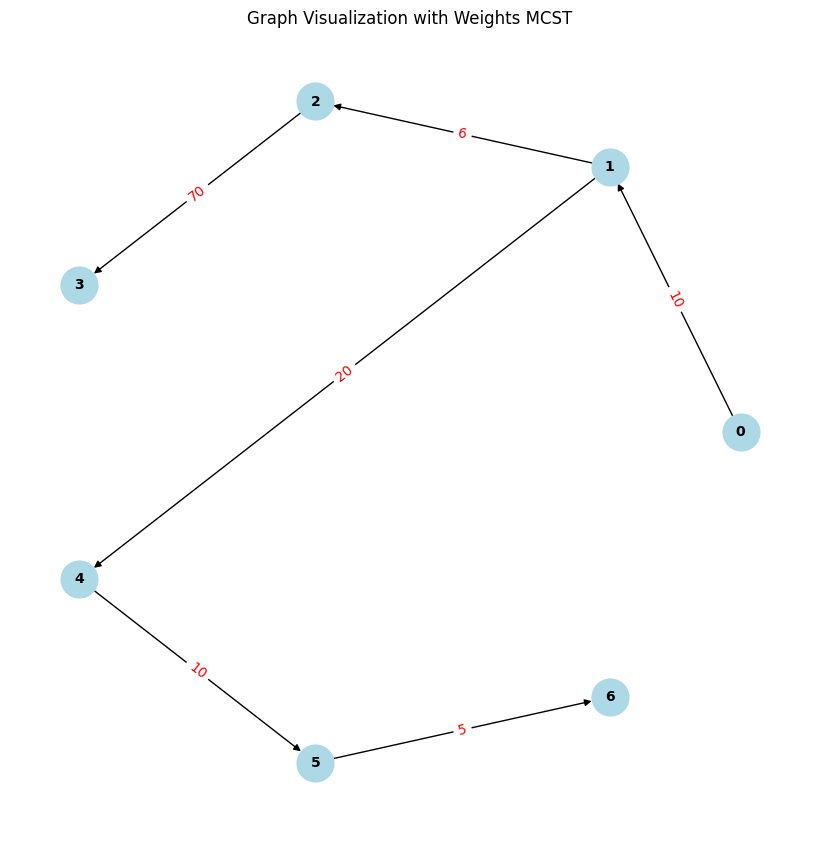

In [51]:

G = nx.DiGraph()

# Add edges to the graph
for (i, j, w) in mcst_list:
    G.add_edge(i, j, weight=w)

# Define positions for nodes in a circular layout
pos = {i: (np.cos(2 * np.pi * i / size), np.sin(2 * np.pi * i / size)) for i in range(size)}

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

# Draw edge labels
edge_labels = {(i, j): w for (i, j, w) in mcst_list}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the plot
plt.title("Graph Visualization with Weights MCST")
plt.show()

In [47]:
def kruskal(WList):
  (edges, component, TE) = ([],{},[])
  for u in WList.keys():
    # Weight as first component to sort easily
    edges.extend([(d,u,v) for (v,d) in WList[u]])
    component[u] = u
  edges.sort()
  print(edges)

  for (d,u,v) in edges:
    if component[u] != component[v]:
      TE.append((u,v))
      c = component[u]
      for w in WList.keys():
        if component[w] == c:
          component[w] = component[v]
  return(TE)

[(5, 5, 6), (5, 6, 5), (6, 1, 2), (6, 2, 1), (10, 0, 1), (10, 1, 0), (10, 4, 5), (10, 4, 6), (10, 5, 4), (10, 6, 4), (18, 0, 2), (18, 2, 0), (20, 1, 4), (20, 4, 1), (70, 2, 3), (70, 3, 2)]


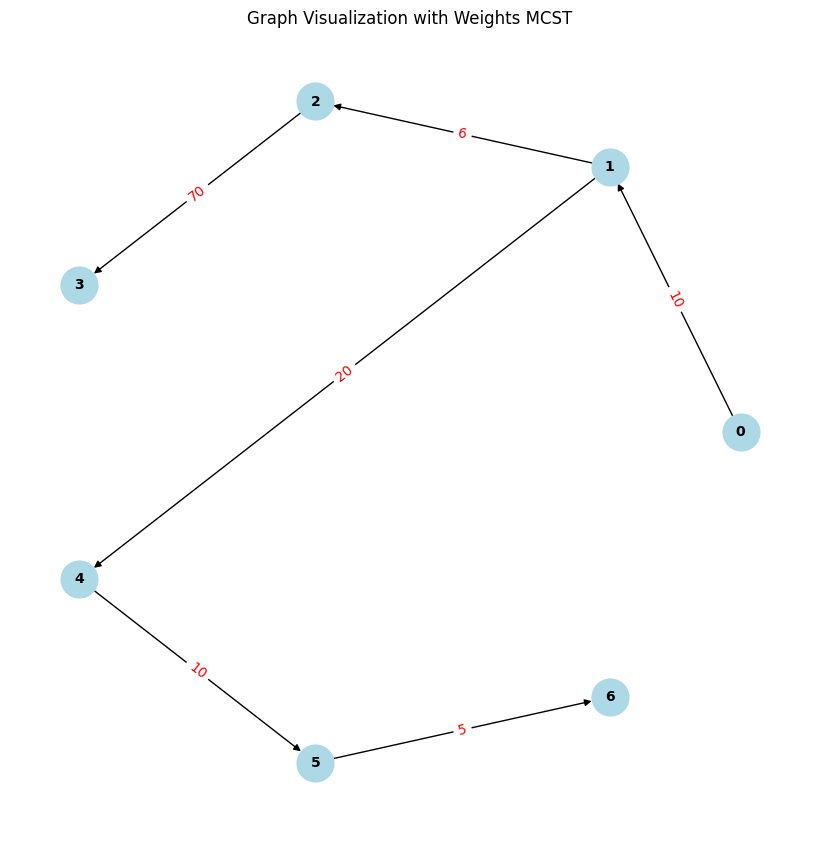

In [48]:
dedges = [(0,1,10),(0,2,18),(1,2,6),(1,4,20),(2,3,70),(4,5,10),(4,6,10),(5,6,5)]
edges = dedges + [(j,i,w) for (i,j,w) in dedges]
size = 7
WL = {}
for i in range(size):
    WL[i] = []
for (i,j,d) in edges:
    WL[i].append((j,d))


TEedge = kruskal(WL)

mcst_list = []

for parent , child , weight  in dedges:
    if (parent,child) in TEedge:
        mcst_list.append((parent,child,weight))
        
mcst_list
G = nx.DiGraph()

# Add edges to the graph
for (i, j, w) in mcst_list:
    G.add_edge(i, j, weight=w)

# Define positions for nodes in a circular layout
pos = {i: (np.cos(2 * np.pi * i / size), np.sin(2 * np.pi * i / size)) for i in range(size)}

# Draw the graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

# Draw edge labels
edge_labels = {(i, j): w for (i, j, w) in mcst_list}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the plot
plt.title("Graph Visualization with Weights MCST")
plt.show()